### HW3

For this homework, you are a data scientist working for Pronto (before the end of their contract with the City of Seattle). Your job is to assist in determining how to do end-of-day adjustments in the number of bikes at stations so that all stations will have enough bikes for the next day of operation (as estimated by the weekday average for the station for the year). Your assistance will help in constructing a plan for each day of the week that specifies how many bikes should be moved from each station and how many bikes must be delievered to each station.

Your assignment is to construct plots of the differences between 'from' and 'to' counts for each station by day of the week. Do this as a set of 7 subplots. You should use at least one function to construct your plots.

#### Q1: create a dataframe with station counts averages by day-of-week

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("2015_trip_data.csv")
#df.head()

Create time using DatetimeIndex method in pandas

In [3]:
time = pd.DatetimeIndex(df.starttime)

In [4]:
df["DoW"] = time.dayofweek
pd.value_counts(df["DoW"])

3    21505
0    21266
4    21097
2    20748
1    20465
5    20358
6    17407
Name: DoW, dtype: int64

Create data frames that contains the daily count of "from" and "to" records for each station respectively

In [5]:
df1F = df.groupby([time.date, 'DoW', 'from_station_id']).size().unstack()
df1T = df.groupby([time.date, 'DoW', 'to_station_id']).size().unstack()

In [6]:
df1F.head()

,from_station_id,BT-01,BT-03,BT-04,BT-05,CBD-03,CBD-04,CBD-05,CBD-06,CBD-07,CBD-13,...,UD-04,UD-07,UW-01,UW-02,UW-04,UW-06,UW-07,UW-10,WF-01,WF-04
,DoW,,,,,,,,,,,,,,,,,,,,,
2014-10-13,0,10.0,6.0,13.0,1.0,14.0,NaN,18.0,26.0,6.0,8.0,...,6.0,3.0,NaN,4.0,3.0,3.0,7.0,4.0,8.0,13.0
2014-10-14,1,14.0,7.0,12.0,8.0,7.0,NaN,7.0,16.0,15.0,19.0,...,4.0,4.0,1.0,2.0,7.0,2.0,1.0,2.0,11.0,7.0
2014-10-15,2,4.0,9.0,7.0,2.0,12.0,NaN,13.0,13.0,12.0,10.0,...,6.0,3.0,NaN,3.0,4.0,6.0,3.0,5.0,5.0,1.0
2014-10-16,3,12.0,11.0,12.0,7.0,8.0,NaN,7.0,14.0,5.0,22.0,...,3.0,3.0,NaN,3.0,5.0,6.0,4.0,6.0,11.0,4.0
2014-10-17,4,8.0,4.0,8.0,12.0,15.0,NaN,9.0,5.0,3.0,10.0,...,4.0,4.0,2.0,NaN,5.0,5.0,2.0,NaN,4.0,4.0


In [7]:
df1T.head()

,to_station_id,BT-01,BT-03,BT-04,BT-05,CBD-03,CBD-04,CBD-05,CBD-06,CBD-07,CBD-13,...,UD-04,UD-07,UW-01,UW-02,UW-04,UW-06,UW-07,UW-10,WF-01,WF-04
,DoW,,,,,,,,,,,,,,,,,,,,,
2014-10-13,0,6.0,11.0,3.0,6.0,16.0,NaN,26.0,24.0,6.0,12.0,...,4.0,4.0,2.0,2.0,4.0,NaN,7.0,4.0,17.0,11.0
2014-10-14,1,8.0,7.0,6.0,13.0,15.0,NaN,25.0,21.0,11.0,23.0,...,9.0,3.0,1.0,NaN,5.0,2.0,NaN,3.0,10.0,8.0
2014-10-15,2,6.0,8.0,3.0,1.0,14.0,NaN,12.0,10.0,8.0,16.0,...,9.0,3.0,NaN,2.0,2.0,3.0,3.0,7.0,6.0,3.0
2014-10-16,3,14.0,14.0,4.0,9.0,10.0,NaN,14.0,18.0,3.0,25.0,...,5.0,5.0,1.0,2.0,7.0,1.0,3.0,9.0,16.0,5.0
2014-10-17,4,4.0,2.0,5.0,11.0,17.0,NaN,10.0,10.0,8.0,20.0,...,7.0,3.0,2.0,1.0,4.0,3.0,1.0,2.0,3.0,6.0


The daily difference at each station

In [8]:
diff = df1F - df1T

In [9]:
diff.head()

,from_station_id,BT-01,BT-03,BT-04,BT-05,CBD-03,CBD-04,CBD-05,CBD-06,CBD-07,CBD-13,...,UD-04,UD-07,UW-01,UW-02,UW-04,UW-06,UW-07,UW-10,WF-01,WF-04
,DoW,,,,,,,,,,,,,,,,,,,,,
2014-10-13,0,4.0,-5.0,10.0,-5.0,-2.0,NaN,-8.0,2.0,0.0,-4.0,...,2.0,-1.0,NaN,2.0,-1.0,NaN,0.0,0.0,-9.0,2.0
2014-10-14,1,6.0,0.0,6.0,-5.0,-8.0,NaN,-18.0,-5.0,4.0,-4.0,...,-5.0,1.0,0.0,NaN,2.0,0.0,NaN,-1.0,1.0,-1.0
2014-10-15,2,-2.0,1.0,4.0,1.0,-2.0,NaN,1.0,3.0,4.0,-6.0,...,-3.0,0.0,NaN,1.0,2.0,3.0,0.0,-2.0,-1.0,-2.0
2014-10-16,3,-2.0,-3.0,8.0,-2.0,-2.0,NaN,-7.0,-4.0,2.0,-3.0,...,-2.0,-2.0,NaN,1.0,-2.0,5.0,1.0,-3.0,-5.0,-1.0
2014-10-17,4,4.0,2.0,3.0,1.0,-2.0,NaN,-1.0,-5.0,-5.0,-10.0,...,-3.0,1.0,0.0,NaN,1.0,2.0,1.0,NaN,1.0,-2.0


Manupulation of the dataset to make the DayofWeek a column, in preparation for later aggregation

In [10]:
diff.reset_index(level=0, inplace = True)
diff.drop('level_0', axis = 1, inplace=True)
diff.reset_index(level=0, inplace = True)

In [11]:
diff_avg = diff.groupby('DoW').mean()

drop 'Pronto shop' column

In [12]:
diff_avg.pop('Pronto shop')

DoW
0    NaN
1    0.0
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
Name: Pronto shop, dtype: float64

Data frame for question 1:

In [13]:
diff_avg.index = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

In [14]:
diff_avg

from_station_id,BT-01,BT-03,BT-04,BT-05,CBD-03,CBD-04,CBD-05,CBD-06,CBD-07,CBD-13,...,UD-04,UD-07,UW-01,UW-02,UW-04,UW-06,UW-07,UW-10,WF-01,WF-04
Sun,0.339623,0.830189,1.113208,-0.207547,-2.867925,1.583333,-3.960784,-4.886792,-0.595745,-3.962264,...,-1.615385,0.975610,0.392857,0.909091,-0.800000,0.620000,-0.228571,-0.878049,-1.962264,-2.979592
Mon,1.000000,1.519231,1.134615,-0.134615,-2.788462,0.090909,-4.900000,-5.211538,-0.673077,-3.884615,...,-0.862745,0.757576,0.176471,1.821429,-0.568182,-0.081633,-0.500000,-1.051282,-0.788462,-2.458333
Tue,-0.372549,1.865385,0.862745,-0.450980,-3.423077,-0.363636,-5.360000,-5.176471,-1.039216,-4.115385,...,-0.882353,1.371429,0.161290,0.314286,-0.704545,0.416667,-0.702703,-1.263158,-0.705882,-3.574468
Wed,0.173077,3.098039,1.640000,-1.060000,-2.500000,1.181818,-4.660000,-5.923077,0.448980,-4.903846,...,-1.319149,1.000000,0.343750,1.200000,-0.021277,0.644444,-0.342105,-1.318182,-1.098039,-3.204082
Thu,1.392157,3.596154,1.180000,0.254902,-3.372549,1.272727,-3.360000,-5.764706,-0.705882,-8.269231,...,-1.000000,0.666667,0.142857,0.851852,-0.431818,0.346939,-0.028571,-0.722222,-0.137255,-3.244898
Fri,-0.137255,3.431373,0.209302,-0.098039,-2.734694,-0.818182,-0.739130,-2.081633,0.566667,-5.384615,...,-1.744681,0.380952,-0.421053,0.966667,-0.473684,0.542857,-0.405405,-0.724138,-1.900000,-6.729167
Sat,-0.903846,1.686275,0.631579,-0.163265,-1.294118,-0.800000,-1.191489,-0.909091,-0.259259,-3.979167,...,-1.428571,0.461538,-0.352941,1.162162,-0.026316,0.027778,-0.593750,-1.000000,-2.812500,-3.957447


#### Q2: structure the 7 day-of-week plots as subplots
#### Q3: label the plots by day-of-week
#### Q4: label the x-axis for plots in the last row and label the y-axis for plots in the left-most column

In [15]:
diff_avg.transpose().head()

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
from_station_id,,,,,,,
BT-01,0.339623,1.000000,-0.372549,0.173077,1.392157,-0.137255,-0.903846
BT-03,0.830189,1.519231,1.865385,3.098039,3.596154,3.431373,1.686275
BT-04,1.113208,1.134615,0.862745,1.640000,1.180000,0.209302,0.631579
BT-05,-0.207547,-0.134615,-0.450980,-1.060000,0.254902,-0.098039,-0.163265
CBD-03,-2.867925,-2.788462,-3.423077,-2.500000,-3.372549,-2.734694,-1.294118


In [16]:
diff_avg.transpose().columns

Index(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], dtype='object')

In [17]:
def plot_bar1(df, column, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param str column: name of the column to plot
    :param dict opts: key is plot attribute
    """
    n_groups = len(df.index)
    index = np.arange(n_groups)  # The "raw" x-axis of the bar plot
    rects1 = plt.bar(index, df[column])
    if 'xlabel' in opts.keys():
      plt.xlabel(opts['xlabel'])
    else:
        pass
    if 'ylabel'in opts.keys():
      plt.ylabel(opts['ylabel'])
    else:
        pass
    if 'xticks' in opts.keys()  and opts['xticks']:
      plt.xticks(index, df.index)  # Convert "raw" x-axis into labels
      _, labels = plt.xticks()  # Get the new labels of the plot
      plt.setp(labels, rotation=90)  # Rotate labels to make them readable
    else:
      labels = ['' for x in df.index]
      plt.xticks(index, labels)   
    if 'ylim' in opts.keys():
      plt.ylim(opts['ylim'])
    if 'title' in opts.keys():
      plt.title(opts['title'])

In [18]:
def plot_barN(df, columns, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param list-of-str columns: names of the column to plot
    :param dict opts: key is plot attribute
    """
    num_columns = len(columns)
    local_opts = dict(opts)  # Make a deep copy of the object
    idx = 0
    for column in columns:
        idx += 1
        local_opts['xticks'] = False
        local_opts['xlabel'] = ''
        local_opts['title'] = column
        if idx == num_columns:
          local_opts['xticks'] = True
          local_opts['xlabel'] = opts['xlabel']
        plt.subplot(num_columns, 1, idx)
        plot_bar1(df, column, local_opts)

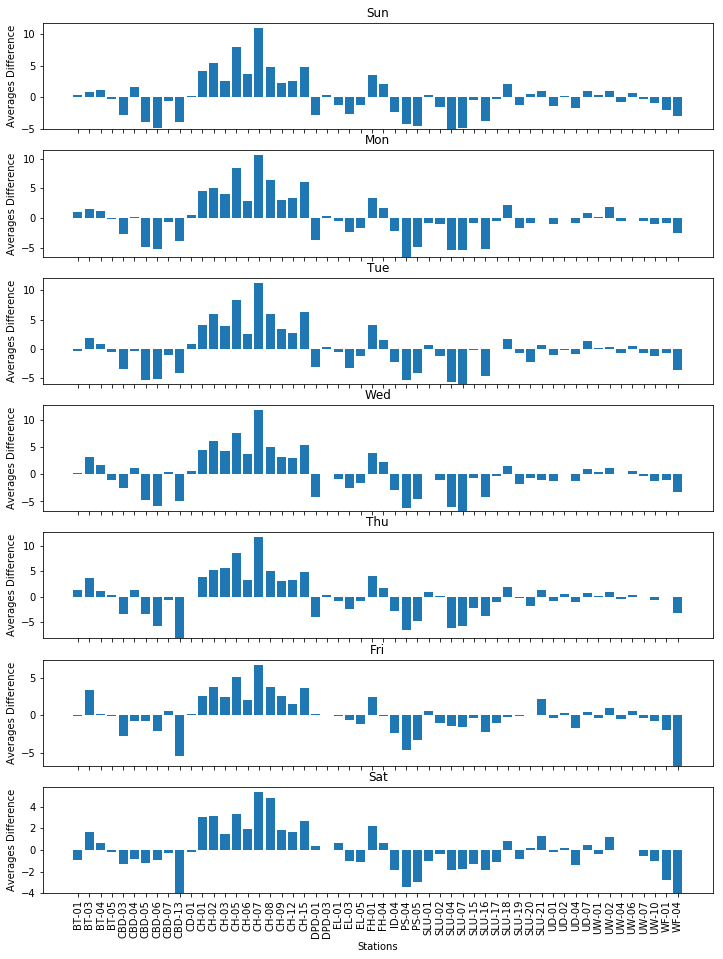

In [19]:
fig = plt.figure(figsize=(12, 16))  # Controls global properties of the bar plot
opts = {'xlabel': 'Stations', 'ylabel': 'Averages Difference'}
plot_barN(diff_avg.transpose(), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], opts)